In [159]:
"""
@author: maximefontana
"""
# System
import sys

# Graph Data
import snap
import networkx as nx

# Scientific Computing 
import numpy as np
import scipy
import pandas as pd
import csv

# Math
import random as ran
from time import time

# Custom imports
%run Algorithms.ipynb
%run ClusteringEvaluation.ipynb
%run PlotFunctions.ipynb
%run GroundTruthGen.ipynb
%run SBM.ipynb

# Specific models
from sklearn.cluster import SpectralClustering, KMeans
from sklearn import metrics
from sklearn import preprocessing

# Plotting
#import tensorflow as tf
from matplotlib import pyplot as plt

In [160]:
adjc_matrix = pd.read_csv('datasets/DRUGNET.csv')
attributes = pd.read_csv('datasets/DRUGATTR.csv')

In [161]:
attributes

,Unnamed: 0,Ethnicity,Gender,HasTie
0,1,1,1,1
1,2,1,1,1
2,3,1,1,1
3,4,1,2,1
4,5,3,1,1
...,...,...,...,...
288,294,3,2,0
289,295,3,2,1
290,296,3,2,0
291,297,1,2,0


In [162]:
#attributes.shape
adjc_matrix.shape

(293, 294)

In [163]:
G = nx.Graph(adjc_matrix.drop(['Unnamed: 0'], axis=1).values)

293


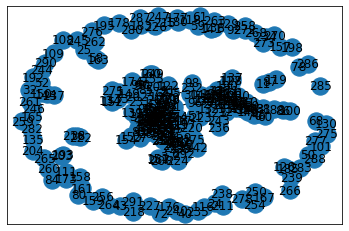

In [164]:
nx.draw_networkx(G)
print(len(G.nodes()))

In [165]:
elems_to_remove = np.asarray(attributes[attributes['Gender'] == 0]['Unnamed: 0'])
print(elems_to_remove)

[191 201 204 265 266 273 288]


In [166]:
for i in range(len(elems_to_remove)):
    if elems_to_remove[i] in G.nodes():
        G.remove_node(elems_to_remove[i])
        
# Check if nodes have been removed
print(len(G.nodes())) 

286


In [167]:
# Clean the rows with 'Unknown' gender
data = attributes.drop(attributes[attributes['Gender'] == 0].index)
data.shape # Verify new shape 

(286, 4)

In [168]:
# Powerset of female students
x = np.asarray(data['Unnamed: 0'].where(data['Gender'] == 2))
x = x[~np.isnan(x)]
print(np.sort(x))

[  4.  18.  19.  26.  28.  37.  46.  47.  52.  54.  60.  62.  71.  72.
  75.  82.  88.  89.  90.  92.  93.  97. 100. 102. 113. 114. 122. 132.
 147. 150. 152. 153. 158. 161. 167. 180. 186. 197. 203. 205. 207. 208.
 211. 214. 218. 220. 226. 230. 235. 240. 247. 249. 250. 251. 252. 258.
 259. 260. 267. 268. 269. 270. 271. 272. 274. 275. 276. 277. 278. 279.
 280. 281. 282. 284. 285. 286. 289. 290. 291. 292. 293. 294. 295. 296.
 297. 298.]


In [169]:
# Powerset of male students
y = np.asarray(data['Unnamed: 0'].where(data['Gender'] == 1))
y = y[~np.isnan(y)]
print(np.sort(y))

[  1.   2.   3.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.
  16.  17.  20.  21.  22.  23.  24.  25.  27.  29.  30.  31.  32.  33.
  34.  35.  36.  38.  39.  40.  41.  42.  43.  44.  45.  48.  49.  50.
  51.  53.  55.  56.  57.  58.  59.  61.  63.  64.  65.  66.  67.  68.
  69.  70.  73.  74.  77.  78.  79.  80.  81.  83.  84.  85.  86.  87.
  91.  94.  95.  96.  98.  99. 101. 103. 104. 105. 106. 107. 108. 109.
 110. 112. 115. 116. 117. 118. 119. 120. 121. 123. 124. 125. 126. 127.
 128. 129. 130. 131. 133. 134. 135. 136. 137. 138. 139. 140. 141. 142.
 143. 144. 145. 146. 148. 149. 151. 154. 155. 156. 157. 159. 160. 162.
 163. 164. 165. 166. 168. 169. 170. 171. 172. 173. 174. 175. 176. 177.
 178. 179. 181. 182. 183. 184. 185. 187. 188. 189. 190. 192. 193. 194.
 195. 196. 198. 199. 200. 202. 206. 209. 210. 212. 213. 215. 216. 217.
 219. 221. 222. 223. 224. 225. 227. 228. 229. 231. 232. 233. 234. 236.
 237. 238. 239. 241. 242. 243. 244. 245. 246. 248. 253. 254. 255. 256.
 257. 

In [170]:
x_y_join = np.concatenate((x, y)).astype(int)
print(x_y_join)

[  4  18  19  26  28  37  46  47  52  54  60  62  71  72  75  82  88  89
  90  92  93  97 100 102 113 114 122 132 147 150 152 153 158 161 167 180
 186 197 203 205 207 208 211 214 218 220 226 230 235 240 247 249 250 251
 252 258 259 260 267 268 269 270 271 272 274 275 276 277 278 279 280 281
 282 284 285 286 289 290 291 292 293 294 295 296 297 298   1   2   3   5
   6   7   8   9  10  11  12  13  14  15  16  17  20  21  22  23  24  25
  27  29  30  31  32  33  34  35  36  38  39  40  41  42  43  44  45  48
  49  50  51  53  55  56  57  58  59  61  63  64  65  66  67  68  69  70
  73  74  77  78  79  80  81  83  84  85  86  87  91  94  95  96  98  99
 101 103 104 105 106 107 108 109 110 112 115 116 117 118 119 120 121 123
 124 125 126 127 128 129 130 131 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 148 149 151 154 155 156 157 159 160 162 163 164 165 166
 168 169 170 171 172 173 174 175 176 177 178 179 181 182 183 184 185 187
 188 189 190 192 193 194 195 196 198 199 200 202 20

In [171]:
# Now that we have everything, our dataset made of 155 students as well as their genders
female_students = x 
male_students = y

gender_partition = np.zeros(len(G.nodes()))

# Fill in gender partition 

for i in range(len(G.nodes())):
    if list(G)[i] in female_students:
        gender_partition[i] = 0
    elif list(G)[i] in male_students:
        gender_partition[i] = 1
        
print(gender_partition)

[0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1.
 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]


In [172]:
fair_results = []
unfair_results = []


for k in range(2,16):
    labels, labels_rc = un_spectral(G, k)
    fair_labels, fair_labels_rc = un_spectral_fair(G, k, labels)
    
    fair_results.append(balance(gender_partition.astype(int), fair_labels))
    unfair_results.append(balance(gender_partition.astype(int), labels))

Spectral Clustering results : -29.84887334887335
Fair Spectral Clustering results : -26.518880722452156


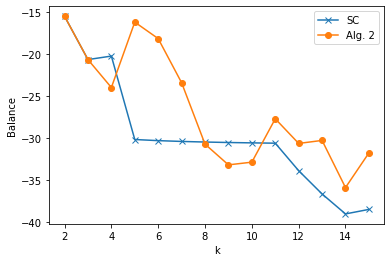

In [173]:
axis_x = np.arange(2, 16, 1)

plt.plot(axis_x, unfair_results, label = 'SC', marker='x')
plt.plot(axis_x, fair_results, label = 'Alg. 2', marker='o')
print('Spectral Clustering results :', np.mean(unfair_results))
print('Fair Spectral Clustering results :', np.mean(fair_results))
plt.xlabel('k')
# Set the y axis label of the current axis.
plt.ylabel('Balance')
# Set a title of the current axes.
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [174]:
fair_results = []
unfair_results = []

for k in range(2,16):
    labels, labels_rc = un_spectral(G, k, normalised=True)
    fair_labels = norm_spectral_fair(G, k, labels)
    
    fair_results.append(balance(gender_partition.astype(int), fair_labels))
    unfair_results.append(balance(gender_partition.astype(int), labels))

Spectral Clustering results : -26.719728287585433
Fair Spectral Clustering results : -25.18810356310356


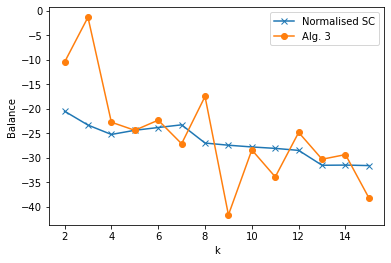

In [175]:
axis_x = np.arange(2, 16, 1)

plt.plot(axis_x, unfair_results, label = 'Normalised SC', marker='x')
plt.plot(axis_x, fair_results, label = 'Alg. 3', marker='o')
print('Spectral Clustering results :', np.mean(unfair_results))
print('Fair Spectral Clustering results :', np.mean(fair_results))
plt.xlabel('k')
# Set the y axis label of the current axis.
plt.ylabel('Balance')
# Set a title of the current axes.
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [176]:
# Powerset of African American students
x = np.asarray(data['Unnamed: 0'].where(data['Ethnicity'] == 2))
x = x[~np.isnan(x)]
print(np.sort(x))

[ 12.  13.  14.  15.  24.  25.  26.  31.  32.  33.  34.  35.  38.  41.
  42.  43.  44.  46.  54.  59.  61.  63.  71.  72.  73.  81.  86.  87.
  88.  89.  90.  91.  92.  95.  98.  99. 100. 101. 102. 108. 116. 120.
 122. 123. 124. 125. 126. 130. 131. 136. 137. 139. 140. 146. 147. 148.
 149. 150. 151. 153. 160. 166. 169. 171. 173. 174. 177. 179. 184. 192.
 193. 194. 196. 198. 202. 206. 207. 209. 212. 213. 215. 216. 222. 233.
 235. 239. 240. 241. 242. 243. 246. 248. 249. 250. 283. 287. 291.]


In [177]:
# Powerset of Latino
y = np.asarray(data['Unnamed: 0'].where(data['Ethnicity'] == 3))
y = y[~np.isnan(y)]
print(np.sort(y))

[  5.   6.   8.  10.  11.  16.  17.  18.  19.  20.  21.  22.  23.  27.
  28.  29.  30.  36.  39.  40.  45.  47.  48.  49.  50.  51.  52.  53.
  55.  56.  58.  62.  64.  65.  66.  67.  68.  70.  74.  75.  77.  78.
  79.  80.  83.  84.  85.  93.  96.  97. 104. 105. 106. 107. 109. 110.
 112. 114. 115. 117. 118. 119. 127. 128. 129. 132. 133. 134. 135. 138.
 141. 142. 143. 144. 145. 155. 156. 157. 158. 159. 161. 163. 165. 168.
 170. 172. 175. 176. 178. 180. 182. 183. 185. 186. 187. 188. 189. 190.
 195. 197. 199. 200. 203. 205. 208. 210. 217. 218. 219. 220. 223. 224.
 225. 226. 227. 229. 230. 231. 232. 234. 236. 238. 244. 245. 251. 253.
 254. 255. 256. 257. 258. 259. 260. 268. 269. 274. 275. 277. 278. 280.
 281. 282. 284. 285. 286. 290. 293. 294. 295. 296. 298.]


In [178]:
z = np.asarray(data['Unnamed: 0'].where(data['Ethnicity'].isin([1,5,6,7])))
z = z[~np.isnan(z)]
print(np.sort(z))

[  1.   2.   3.   4.   7.   9.  37.  57.  60.  69.  82.  94. 103. 113.
 121. 152. 154. 162. 164. 167. 181. 211. 214. 221. 228. 237. 247. 252.
 262. 267. 270. 271. 272. 276. 279. 289. 292. 297.]


In [179]:
african_americans = x 
latinos = y
others = z

ethnicity_partition = np.zeros(len(G.nodes()))

# Fill in gender partition 

for i in range(len(G.nodes())):
    if list(G)[i] in african_americans:
        ethnicity_partition[i] = 0
    elif list(G)[i] in latinos:
        ethnicity_partition[i] = 1
    elif list(G)[i] in others:
        ethnicity_partition[i] = 2
        
print(ethnicity_partition)

[0. 2. 2. 2. 2. 1. 1. 2. 1. 2. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 2. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 2. 1. 0. 2. 0. 1. 0. 1. 1. 1. 1. 1. 2. 1. 0.
 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 2. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 2. 0.
 1. 1. 0. 0. 0. 0. 0. 2. 1. 1. 1. 1. 0. 1. 1. 0. 1. 2. 1. 1. 0. 1. 1. 1.
 0. 2. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 2. 0. 2. 1. 1. 1. 1. 1. 0. 1. 2. 1. 2. 1. 0. 2.
 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 2. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 2. 0. 0. 2. 0. 0. 1. 1.
 1. 1. 2. 0. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 0. 1. 2. 1. 0. 0. 0. 0.
 0. 1. 1. 0. 2. 0. 0. 0. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 0. 2. 0. 0. 2. 1.
 1. 2. 2. 2. 1. 1. 2. 1. 1. 2. 1. 1. 1. 0. 1. 1. 1. 0. 2. 1. 0. 2.]


In [180]:
fair_results = []
unfair_results = []


for k in range(2,16):
    labels, labels_rc = un_spectral(G, k)
    fair_labels, fair_labels_rc = un_spectral_fair(G, k, labels)
    
    fair_results.append(balance(ethnicity_partition.astype(int), fair_labels))
    unfair_results.append(balance(ethnicity_partition.astype(int), labels))

Spectral Clustering results : -37.04587733694877
Fair Spectral Clustering results : -36.39076241219099


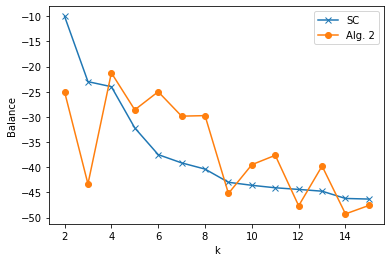

In [181]:
axis_x = np.arange(2, 16, 1)

plt.plot(axis_x, unfair_results, label = 'SC', marker='x')
plt.plot(axis_x, fair_results, label = 'Alg. 2', marker='o')
print('Spectral Clustering results :', np.mean(unfair_results))
print('Fair Spectral Clustering results :', np.mean(fair_results))
plt.xlabel('k')
# Set the y axis label of the current axis.
plt.ylabel('Balance')
# Set a title of the current axes.
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [182]:
fair_results = []
unfair_results = []

#unfair_ratio_cuts = []
#fair_ratio_cuts = []

for k in range(2,16):
    labels, labels_rc = un_spectral(G, k, normalised=True)
    fair_labels = norm_spectral_fair(G, k, labels)
    
    fair_results.append(balance(ethnicity_partition.astype(int), fair_labels))
    unfair_results.append(balance(ethnicity_partition.astype(int), labels))
    
    #unfair_ratio_cuts.append(labels_rc)
    #fair_ratio_cuts.append(fair_labels_rc)

Spectral Clustering results : -32.402115146758
Fair Spectral Clustering results : -33.509302800374236


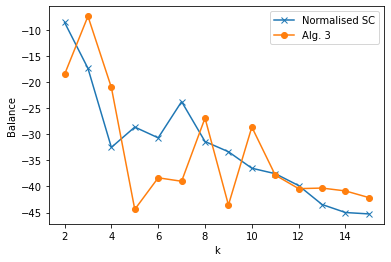

In [183]:
axis_x = np.arange(2, 16, 1)

plt.plot(axis_x, unfair_results, label = 'Normalised SC', marker='x')
plt.plot(axis_x, fair_results, label = 'Alg. 3', marker='o')
print('Spectral Clustering results :', np.mean(unfair_results))
print('Fair Spectral Clustering results :', np.mean(fair_results))
plt.xlabel('k')
# Set the y axis label of the current axis.
plt.ylabel('Balance')
# Set a title of the current axes.
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()